In [59]:
from weight_shared_analyzer import WeightSharedRun, plot_pareto_curves_ws, get_pareto_curves_df
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

In [44]:
smallest_subnet = {"d":[0,0,0,0], "e": 0.1}
middle_1_subnet = {"d":[0,1,0,1], "e": 0.14}
middle_2_subnet = {"d":[1,1,1,1], "e": 0.18}
largest_subnet = {"d":[2,2,2,2], "e": 0.25}
pareto_front_repr = [smallest_subnet, middle_1_subnet, middle_2_subnet, largest_subnet]
pareto_mapping = {f"{smallest_subnet}": "smallest",  f"{middle_1_subnet}": "middle-1", f"{middle_2_subnet}": "middle-2", f"{largest_subnet}" : "largest"}
subnet_ordering = ["smallest", "middle-1", "middle-2", "largest"]


In [48]:
fedavg_smallest = WeightSharedRun("flofa/cifar10-cleaned/1dl2fxi9", pareto_front_repr, pareto_mapping)
fedavg_middle_1 = WeightSharedRun("flofa/cifar10-cleaned/w2sqaon2", pareto_front_repr, pareto_mapping)
fedavg_middle_2 = WeightSharedRun("flofa/cifar10-cleaned/3hh2dhn3", pareto_front_repr, pareto_mapping)
fedavg_largest = WeightSharedRun("flofa/cifar10-cleaned/3m7zykwu", pareto_front_repr, pareto_mapping)

print(fedavg_smallest.name)
print(fedavg_smallest.df["round"].max())

print(fedavg_middle_1.name)
print(fedavg_middle_1.df["round"].max())

print(fedavg_middle_2.name)
print(fedavg_middle_2.df["round"].max())

print(fedavg_largest.name)
print(fedavg_largest.df["round"].max())

alph=100-fedavg-smallest-subnet
1650.0
alph=100-fedavg-small-subnet
1750.0
alph=100-fedavg-middle-subnet
1500.0
alph=100-fedavg-largest-subnet
950.0


In [37]:
maxnet = WeightSharedRun("flofa/cifar10-cleaned/3vn2tjv1", pareto_front_repr, pareto_mapping, name="Maxnet+Tracking+Sandwich")
print(maxnet.name)
print(maxnet.df["round"].max())

Maxnet+Tracking+Sandwich
1400.0


In [38]:
TS = WeightSharedRun("flofa/cifar10-cleaned/393zn5kh", pareto_front_repr, pareto_mapping, name="Tracking+Sandwich")
print(TS.name)
print(TS.df["round"].max())


Tracking+Sandwich
1400.0


In [39]:
sandwich = WeightSharedRun("flofa/cifar10-cleaned/28kmsgaq", pareto_front_repr, pareto_mapping, name="Sandwich")
print(sandwich.name)
print(sandwich.df["round"].max())


Sandwich
1400.0


In [40]:
random = WeightSharedRun("flofa/cifar10-cleaned/wvbq5byq", pareto_front_repr, pareto_mapping, name="Random")
print(random.name)
print(random.df["round"].max())

Random
1450.0


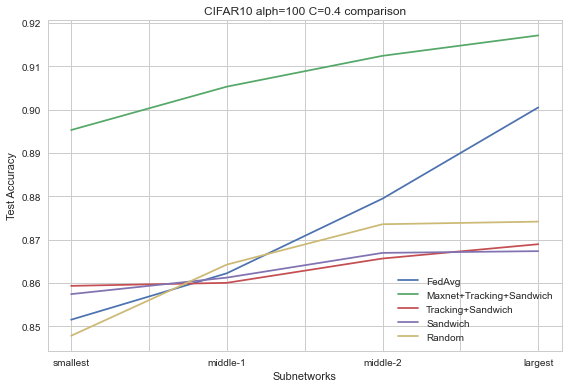

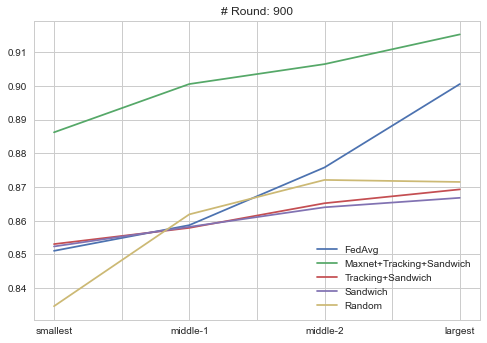

In [63]:
matplotlib.style.use("seaborn-whitegrid")
fedavg_runs = [fedavg_smallest, fedavg_middle_1, fedavg_middle_2,  fedavg_largest]
ws_runs = [maxnet, TS, sandwich, random]
mode="avg"
rounds = [None, 900]
for rnum in rounds:
    fed_pareto = get_pareto_curves_df(fedavg_runs, "Test/{model}/Acc", uptil_round=rnum, rename=True, axis=0, name="FedAvg")
    ws_pareto = get_pareto_curves_df(ws_runs,  "Test/{model}/Acc", uptil_round=rnum, rename=True, mode=mode)
    final_df = pd.concat([fed_pareto, ws_pareto], axis=1).loc[subnet_ordering]
    final_df.plot.line(title=f"# Round: {rnum if rnum is not None else 'Max'}")
    if rnum is None:
#         plt.ylim([0.84, 0.952])
        plt.xlabel("Subnetworks")
        plt.ylabel("Test Accuracy")
        plt.title("CIFAR10 alph=100 C=0.4 comparison")
        plt.tight_layout()
        plt.legend(loc=0)

        plt.savefig("cifar10_alph100.pdf")
        



